In [1]:
import pandas as pd
import json
import os
from platform import python_version

In [2]:
directory = os.getcwd()

In [3]:
print(directory)

/Users/adwitiyaarghapb/Desktop/data_visualisation


In [19]:
content_of_directory = os.listdir("/Users/adwitiyaarghapb/Desktop/data_visualisation")
print(content_of_directory)

['.DS_Store', 'heart_dataset.ipynb', 'data_visualisation_heart_dataset.ipynb', '.ipynb_checkpoints', 'data_visualisation', '.git', 'dataset.csv']


In [20]:
df = pd.read_csv("/Users/adwitiyaarghapb/Desktop/data_visualisation/dataset.csv")
df


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,37,ATA,130,283,0,ST,98,N,0.0,Up,0
1,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
2,54,NAP,150,195,0,Normal,122,N,0.0,Up,0
3,39,NAP,120,339,0,Normal,170,N,0.0,Up,0
4,45,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
911,45,TA,110,264,0,Normal,132,N,1.2,Flat,1
912,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1
913,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
914,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [21]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             916 non-null    int64  
 1   ChestPainType   916 non-null    object 
 2   RestingBP       916 non-null    int64  
 3   Cholesterol     916 non-null    int64  
 4   FastingBS       916 non-null    int64  
 5   RestingECG      916 non-null    object 
 6   MaxHR           916 non-null    int64  
 7   ExerciseAngina  916 non-null    object 
 8   Oldpeak         916 non-null    float64
 9   ST_Slope        916 non-null    object 
 10  HeartDisease    916 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 78.8+ KB


In [22]:
df.shape


(916, 11)

In [23]:
df.size

10076

In [24]:
def dataset_description(df):
    columns=df.columns.to_list()
    print('No. of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical Column in DataFrame: ',len(ncol))
    print('\nNumerical Column Names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical Column Names: ',ccol)
    
dataset_description(df)

No. of Columns in DataFrame:  11

Column attribute Names:  ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of Numerical Column in DataFrame:  7

Numerical Column Names:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of Categorical Column in DataFrame:  4

Categorical Column Names:  ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [25]:
df.isnull().sum() 

Age               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [26]:
df.nunique() 

Age                50
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,916.0,53.530568,9.431151,28.0,47.0,54.0,60.00,77.0
RestingBP,916.0,132.358079,18.510152,0.0,120.0,130.0,140.00,200.0
Cholesterol,916.0,198.721616,109.461224,0.0,173.0,223.0,267.00,603.0
FastingBS,916.0,0.233624,0.423367,0.0,0.0,0.0,0.00,1.0
MaxHR,916.0,136.750000,25.453606,60.0,120.0,138.0,155.25,202.0
Oldpeak,916.0,0.888210,1.067325,-2.6,0.0,0.6,1.50,6.2
HeartDisease,916.0,0.553493,0.497402,0.0,0.0,1.0,1.00,1.0


In [28]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.256477    -0.094236   0.197200 -0.380477  0.257786   
RestingBP     0.256477   1.000000     0.100973   0.071456 -0.114288  0.165285   
Cholesterol  -0.094236   0.100973     1.000000  -0.260769  0.235099  0.050956   
FastingBS     0.197200   0.071456    -0.260769   1.000000 -0.130372  0.052298   
MaxHR        -0.380477  -0.114288     0.235099  -0.130372  1.000000 -0.159799   
Oldpeak       0.257786   0.165285     0.050956   0.052298 -0.159799  1.000000   
HeartDisease  0.281433   0.106887    -0.231920   0.267549 -0.400470  0.403442   

              HeartDisease  
Age               0.281433  
RestingBP         0.106887  
Cholesterol      -0.231920  
FastingBS         0.267549  
MaxHR            -0.400470  
Oldpeak           0.403442  
HeartDisease      1.000000  


In [29]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
skewness_result = df_numeric.skew()
print(skewness_result)

Age              -0.199386
ChestPainType          NaN
RestingBP         0.182885
Cholesterol      -0.608598
FastingBS         1.261120
RestingECG             NaN
MaxHR            -0.141142
ExerciseAngina         NaN
Oldpeak           1.021184
ST_Slope               NaN
HeartDisease     -0.215562
dtype: float64


In [30]:
print(df.columns)

Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


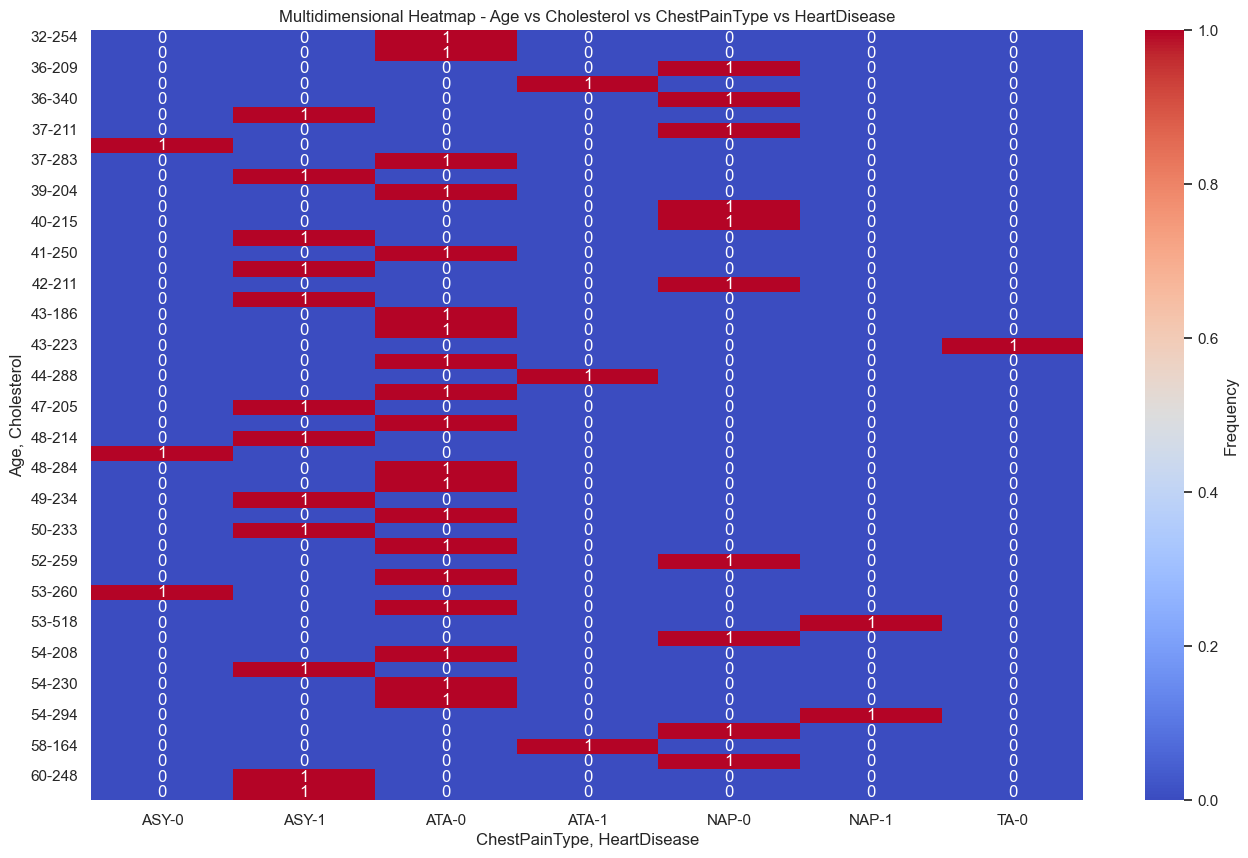

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 20 rows
df_subset = df.head(50)

# Create a pivot table
pivot_table = df_subset.pivot_table(index=['Age', 'Cholesterol'], columns=['ChestPainType', 'HeartDisease'], aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.set(style='whitegrid')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Frequency'})
plt.title('Multidimensional Heatmap - Age vs Cholesterol vs ChestPainType vs HeartDisease')
plt.xlabel('ChestPainType, HeartDisease')
plt.ylabel('Age, Cholesterol')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


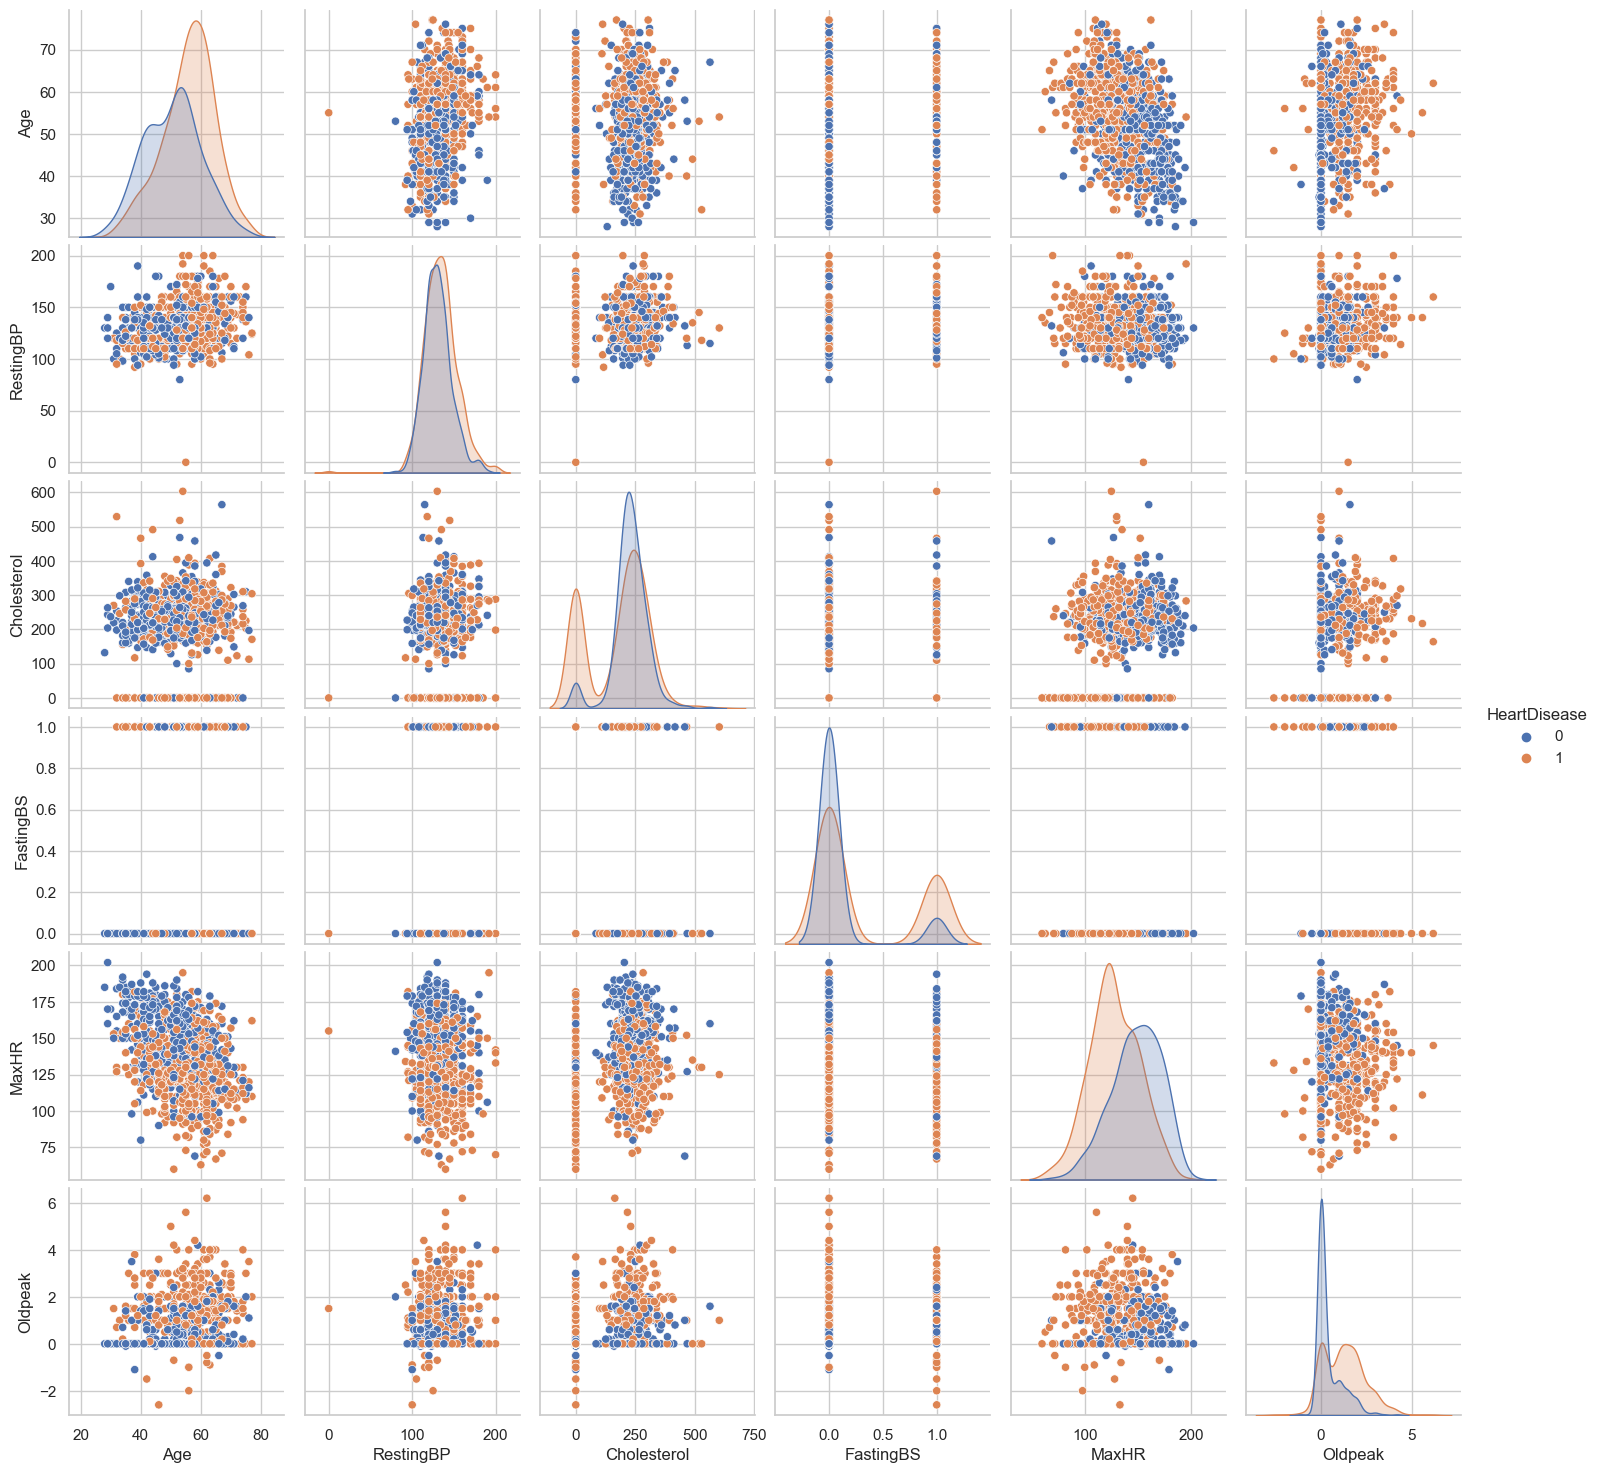

In [32]:
sns.pairplot(df,hue='HeartDisease')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


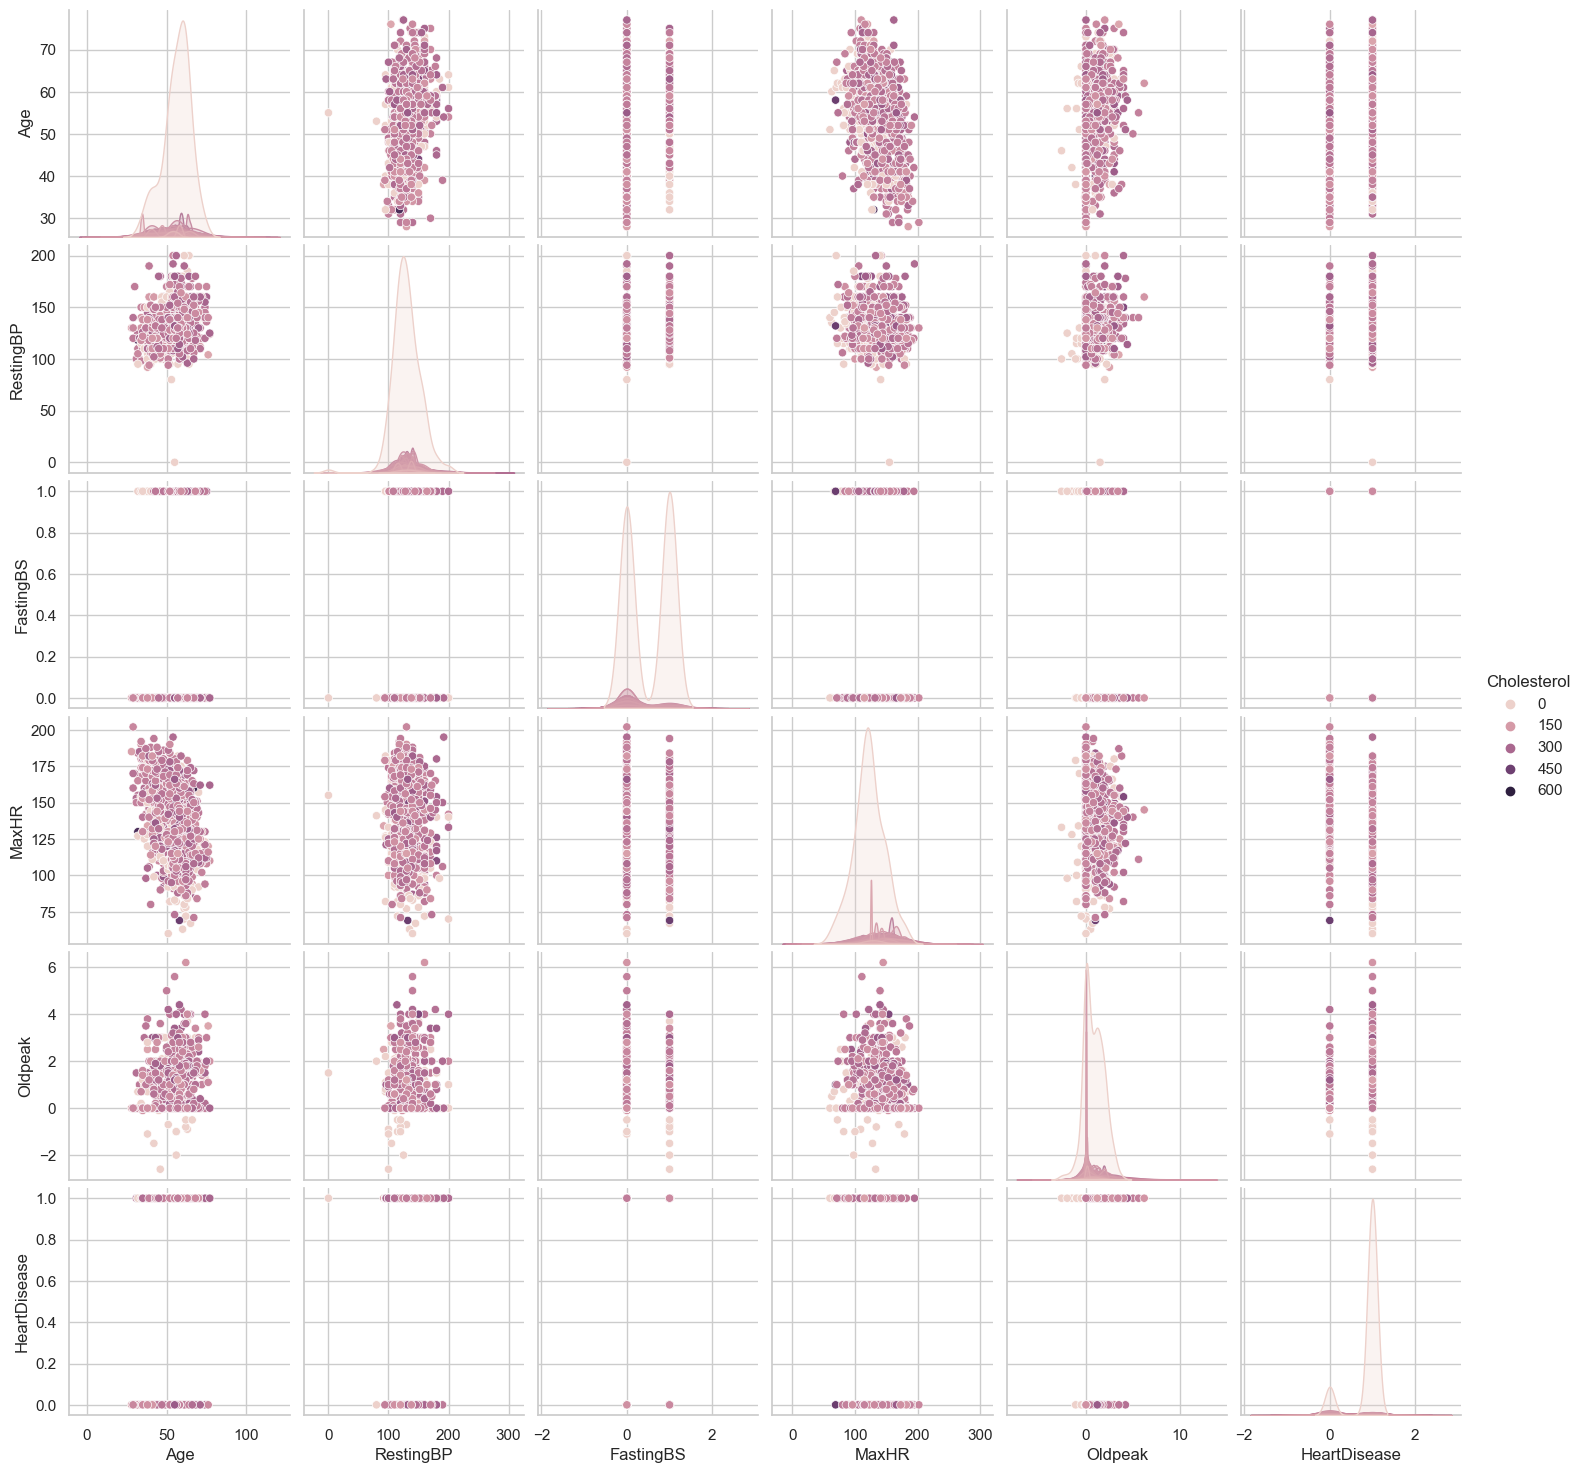

In [33]:
sns.pairplot(df,hue='Cholesterol')